Data Prepared

In [1]:
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
# Read dataset
df=pd.read_csv('https://raw.githubusercontent.com/cwa312/Project4/refs/heads/main/Resources/heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## our target:
1 means positive or *Precsence*  0 means negative or Abscence





# **description**



* cp = chestpain
* trestbps=resting blood pressure
* chol =serum cholestoral
* fbs= fasting blood sugar > 120 mg/dl
* thalach=maximum heart rate achieved
* exang =exercise induced angina
* oldpeak=ST depression induced by exercise relative to rest
* restecg=Resting electrocardiographic results
* ca =number of major vessels colored by fluoroscopy
* thal =thalium stress test result
* target presence of heart disease
* slope = slope of the peak excercise st segment




 **Data preprocessing**

In [3]:
# display the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# define the continous feature(Numercal feature)
numerical_feature=["age","trestbps","chol","fbs","thalach","oldpeak","target"]

In [5]:
# identify the categorical variable using list comperhensive
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
df[categorical_feature]= df[categorical_feature].astype('object')

In [6]:
# check the dtypes after it is converted
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,int64
restecg,object
thalach,int64
exang,object
oldpeak,float64


**Explore data**

In [7]:
# get the summary statistics for numerical variable
df[numerical_feature].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [8]:
# get the summary statistics for categorical variable
df[categorical_feature].describe().T

,count,unique,top,freq
sex,303,2,1,207
cp,303,4,0,143
restecg,303,3,1,152
exang,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thal,303,4,2,166


In [9]:
# check for missing value in the dataset
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
# check outlier for the numerical variable
q1=df[numerical_feature].quantile(.25)
q3=df[numerical_feature].quantile(.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound =q3+1.5*IQR
out_lier_count =(df[numerical_feature]<lower_bound) | (df[numerical_feature]>upper_bound)
out_lier_count.sum()

,0
age,0
trestbps,9
chol,5
fbs,45
thalach,1
oldpeak,5
target,0


In [11]:
# encode the categorical variable using get_dummies()

cat_encode =pd.get_dummies(df[categorical_feature],dtype=int)
cat_encode

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,exang_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0,1,0,1,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,0,1,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
300,0,1,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
301,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [12]:
# concate the categorical and numerical variable and target
concate_df=pd.concat([cat_encode,df[numerical_feature]],axis=1)
concate_df.head()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,exang_0,...,thal_1,thal_2,thal_3,age,trestbps,chol,fbs,thalach,oldpeak,target
0,0,1,0,0,0,1,1,0,0,1,...,1,0,0,63,145,233,1,150,2.3,1
1,0,1,0,0,1,0,0,1,0,1,...,0,1,0,37,130,250,0,187,3.5,1
2,1,0,0,1,0,0,1,0,0,1,...,0,1,0,41,130,204,0,172,1.4,1
3,0,1,0,1,0,0,0,1,0,1,...,0,1,0,56,120,236,0,178,0.8,1
4,1,0,1,0,0,0,0,1,0,0,...,0,1,0,57,120,354,0,163,0.6,1


our target_variable is target

In [13]:
# Split our preprocessed data into our features and target arrays
y=concate_df['target'].values
x=concate_df.drop(columns=['target']).values

**Scale the dataset**

In [14]:
# # Splitting data into train and test sets
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=0,stratify=y)

# create standardScaler instance
scaler=StandardScaler()
# fit the train data to the scaler
x_scaler =scaler.fit(x_train)
# transform the data
x_train_scaled =x_scaler.transform(x_train)
x_test_scaled=x_scaler.transform(x_test)

# KNN Model

In [83]:


# Create a KNN pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('knn', KNeighborsClassifier())  # Step 2: KNN classifier
])

# Define the parameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors':list(range(1,10)),    # Number of neighbors
    'knn__weights': ['uniform', 'distance'], # Weight function used in prediction
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

def tune_hyperparameters(pipeline, param_grid, x_train, y_train):
    # Create a GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=5)

    # Perform Grid Search and fit the model
    grid_search.fit(x_train_scaled,y_train)

    # Get the best model and hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_


    return best_model, best_params

# Tune hyperparameters for KNN


# Evaluate the best KNN model

 Check for overfitting

In [16]:
# print the classification report for the test
print(classification_report(y_test,knn_pred,target_names=["KNN_Absence","KNN_Presence"]))

              precision    recall  f1-score   support

 KNN_Absence       0.81      0.71      0.76        35
KNN_Presence       0.78      0.85      0.81        41

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.79        76
weighted avg       0.79      0.79      0.79        76



In [17]:
# print classification report for the train dataset
print(classification_report(y_train,best_knn.predict(x_train_scaled),target_names=["Absence","Presence"]))

              precision    recall  f1-score   support

     Absence       0.93      0.89      0.91       103
    Presence       0.91      0.94      0.93       124

    accuracy                           0.92       227
   macro avg       0.92      0.92      0.92       227
weighted avg       0.92      0.92      0.92       227



#Note:
the data is not  overfitted as we see that the recall on both train and test are not big different.

#pattern:
85% the model identified most of  the heart disease.

In [18]:
# Pass the variable on the test clssfication report
out_put=classification_report(y_test,best_knn.predict(x_test_scaled),output_dict=True,target_names=["KNN_Absence","KNN_Presence"])
out_put

{'KNN_Absence': {'precision': 0.8064516129032258,
  'recall': 0.7142857142857143,
  'f1-score': 0.7575757575757576,
  'support': 35.0},
 'KNN_Presence': {'precision': 0.7777777777777778,
  'recall': 0.8536585365853658,
  'f1-score': 0.813953488372093,
  'support': 41.0},
 'accuracy': 0.7894736842105263,
 'macro avg': {'precision': 0.7921146953405018,
  'recall': 0.7839721254355401,
  'f1-score': 0.7857646229739252,
  'support': 76.0},
 'weighted avg': {'precision': 0.7909828334276551,
  'recall': 0.7894736842105263,
  'f1-score': 0.7879900597158859,
  'support': 76.0}}

In [19]:
# convert to dataframe
KNN_report_df = pd.DataFrame(out_put).transpose()
KNN_report_df

,precision,recall,f1-score,support
KNN_Absence,0.806452,0.714286,0.757576,35.000000
KNN_Presence,0.777778,0.853659,0.813953,41.000000
accuracy,0.789474,0.789474,0.789474,0.789474
macro avg,0.792115,0.783972,0.785765,76.000000
weighted avg,0.790983,0.789474,0.787990,76.000000


In [20]:
# filter the only recall that have positive result
knn_recal = KNN_report_df[KNN_report_df.index=='KNN_Presence']
knn_recal

,precision,recall,f1-score,support
KNN_Presence,0.777778,0.853659,0.813953,41.0


# SVM Model

In [21]:
# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']}

In [84]:
# Create a GridSearchCV object



In [82]:
# Get the best parameters



In [24]:
# make prediction on test dataset


check for overfitting by printing classification report on both train and test and check the difference on recall

In [81]:
# print classification report on test dataset



In [80]:
# print classification report on train dataset.


In [27]:
# convert the test classification report to dictionary


In [79]:
# convert the test classification report to dataframe


In [29]:
# filter out the positive result from datafram


#Random Forest

In [30]:
# Define the parameter grid for Random Forest



In [78]:

# fit the train data to the model


In [77]:
# Get the best parameters

# Make predictions using the best model






In [34]:
# convert the classification report to dictionary out put



In [75]:
# conver the dictionary out put to dataframe


In [76]:
# filter out only the recal with positive value.


**DT MODEL**

In [37]:
# Define the parameter grid for Decision Tree


In [38]:
# Create a GridSearchCV object



In [74]:
# make prediction on DT


In [73]:
# print classification reports


In [72]:
# convert the classification report to dictionary out put json format.


In [70]:
# convert to the json format to dataframe:


In [71]:
# filter only the Recall value(positive value)


**LogisticRegression**

In [45]:
# Define the parameter grid for Logistic Regression


In [46]:
# Create a GridSearchCV object


In [85]:
# Perform Grid Search and fit the model

# print the best parameter


In [69]:
# make prediction


In [68]:
# priknt classification report


In [67]:
#convert the classification report to dictionary


In [66]:
# convert the classification report  to DataFrame


In [65]:
# filter out the true positive



**NeuralNetwork**

Compile, Train and Evaluate the Model

In [53]:
len(x_train_scaled[0])

29

In [54]:
# define the model
model = tf.keras.models.Sequential()

In [55]:
# First hidden layer
model.add(tf.keras.layers.Dense(units=16,activation='relu',input_dim=len(x_train_scaled[0])))

# second layer
model.add(tf.keras.layers.Dense(units=8,activation='relu'))

In [56]:
# out put layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [57]:
# print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 625 (2.44 KB)

 Trainable params: 625 (2.44 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['recall'])

In [59]:
# train the model
model.fit(x_train_scaled,y_train,epochs=50)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7254 - recall: 0.2832
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6909 - recall: 0.5511 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6428 - recall: 0.6994
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5879 - recall: 0.7988
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5433 - recall: 0.8383 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5328 - recall: 0.8647 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4925 - recall: 0.9241  
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4625 - recall: 0.9221 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4161 - recall: 0.9302 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4177 - recall: 0.9019 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3887 - recall: 0.9194 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3925 - recall: 0.9418 
Epoch 13/50
8/8 ━━━━━━━━

In [60]:
model_loss,Model_recall=model.evaluate(x_test_scaled,y_test,verbose=2)
print(Model_recall)

3/3 - 0s - 65ms/step - loss: 0.4446 - recall: 0.9024
0.9024389982223511


**Plot all the recall value for all model for comparisons**

we can choose the one with best performance



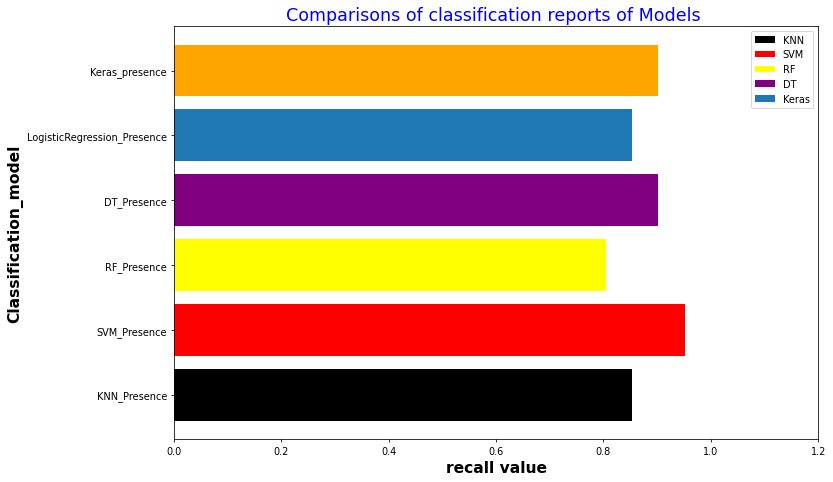

In [64]:
# plot the horizontal bar chart
fig,ax=plt.subplots(figsize=(12,7),dpi=70)
# plot KNN
ax.barh(knn_recal.index,knn_recal["recall"],color='black')

#plot SVM recall value
ax.barh(svm_recall.index,svm_recall["recall"],color='red')

# plot Rf recall value
ax.barh(rf_recall.index,rf_recall["recall"],color="yellow")
ax.barh(dt_recall.index,dt_recall['recall'],color ='purple')
ax.barh(lr_recall.index,lr_recall['recall'])
ax.barh("Keras_presence",Model_recall,color="orange")
# add legend
ax.legend({"KNN":knn_recal["recall"],"SVM":svm_recall["recall"],"RF":rf_recall["recall"],"DT":dt_recall['recall'],"Keras":Model_recall})

plt.title("Comparisons of classification reports of Models ",color='blue',size = 18)
plt.xlim(0,1.20)
plt.xlabel("recall value",fontweight='bold',size=16)
plt.ylabel("Classification_model",fontweight='bold',size=16)
plt.tight_layout()

plt.show()